In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

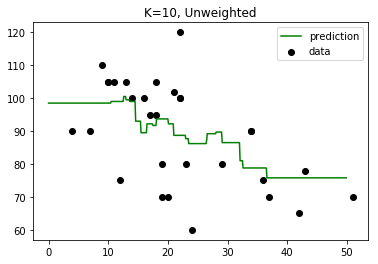

In [3]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
# Question: What does this do?
# It looks like it's creating a 2-D array. When do we need 1-D array and when do we need 2-D arrays? Why?
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# [1,2,3,4] => [[1], [2], [3], [4]]
# row => column

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

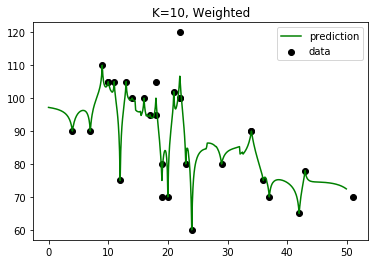

In [4]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

## Question: What does this mean?

> Notice how it seems like the weighted model grossly overfits to points. It is interesting that it oscillates around the datapoints. This is because the decay in weight happens so quickly.

In [5]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/- 0.66)
Weighted Accuracy: 0.11 (+/- 0.94)


> Why don't you add the other feature and mess around with  kk  and weighting to see if you can do any better than we've done so far?

In [33]:
# > However the increased variance in the weighted model is interesting.
# Question: Why is increased variace better?

from scipy import stats

knn_new = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')
X_new = pd.DataFrame({'loudnessmusic': music.loudness, 'duration': music.duration})
Y_new = music.bpm

# Question: How can we do "add the other feature"? I get the error of "x and y must be the same size"


# X_new = pd.DataFrame(stats.zscore(music.loudness))
# Y_new = stats.zscore(music.bpm)
knn_new.fit(X_new, Y_new)

# Question: How would we build T when using 2 features for X?
#T = np.arange(-3, 3, 0.1)[:, None]
# T = np.arange(0, 50, 0.1)[:, np.newaxis]
# a = np.arange(0, 50, 0.1).reshape(-1,1)
# b = np.arange(0, 50, 0.1).reshape(-1,1)
# T = np.concatenate((a,b), axis=1)

# Y_ = knn_new.predict(T)

# plt.scatter(X_new.loudnessmusic, Y_new, c='k', label='data')
# plt.scatter(X_new.duration, Y_new, c='k', label='data')
# plt.plot(T, Y_, c='g', label='prediction')
# plt.legend()
# plt.title('K=10, Weighted')
# plt.show()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=20, p=2,
          weights='distance')

In [32]:
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))
score = cross_val_score(knn_new, X_new, Y_new, cv=5)
print("New score Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Weighted Accuracy: 0.11 (+/- 0.94)
New score Accuracy: 0.13 (+/- 0.73)


In [60]:
knn_new.predict([0.1, 0.1])

/Users/carl/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 95.69793692])